# 1. 데이터 불러오기
- google drive에 업로드 후 마운트하는 방식 사용함

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# 라이브러리 불러오기
import pandas as pd  # 데이터프레임 다루기
import seaborn as sns # 시각화 라이브러리
import matplotlib.pyplot as plt # 기본 그래프 그리기

# 데이터 불러오기
df = pd.read_csv('/content/drive/My Drive/ML_Study/titanic/train.csv')

#2. 데이터 구조 파악
사용한 method
- df.info() : 변수명, 자료형, 결측치 개수 확인
- df.shape : 행과 열 개수 확인 -> (행 수, 열 수) 튜플로 반환됨
- df.columns : 컬럼 이름 확인
- df.describe() : 수치형 변수의 요약 통계
- df.head() / df.tail() : CSV 파일의 상위/하위 5개 행

In [4]:
df.info() # 변수명, 자료형, 결측치 개수 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.shape # 행과 열 개수 확인 -> (행 수, 열 수) 튜플로 반환됨

(891, 12)

In [6]:
df.columns # 컬럼 이름 확인

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
df.describe() # 수치형 변수의 요약 통계

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df.head() # CSV 파일의 상위 5개 행

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df.tail() # CSV 파일의 하위 5개 행

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


#3. 결측치 탐색
- df.isnull().sum()을 사용하여 각 변수의 결측치 개수 확인
- 결측치가 많은 열은 별도록 기록해두기

In [10]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


특별히 결측치가 많은 열
- Age : 결측치 177개
- Cabin : 결측치 687개

#4. 단일 변수 시각화
- 생존 분포 : sns.countplot(x='Survived', data=df)
- 나이 분포 : sns.histplot(df['Age'].dropna(), bins=30)
- 성별에 따른 생존 분포 : sns.countplot(x='Sex', hue='Survived', data=df)
- 객실 등급과 생존률 : sns.barplot(x='Pclass', y='Survived', data=df)
- 변수 간 상관관계 : sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

<Axes: xlabel='Survived', ylabel='count'>

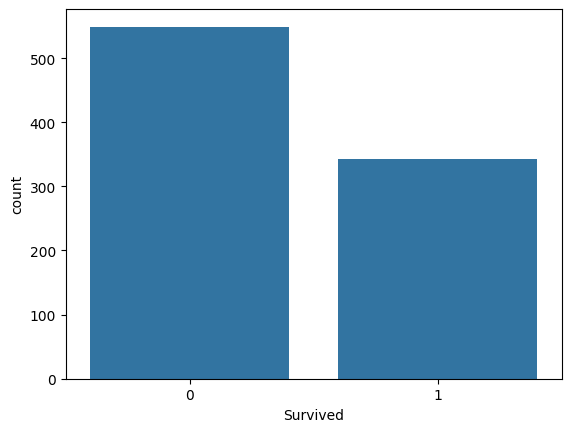

In [11]:
# 생존 분포
sns.countplot(x='Survived', data=df)

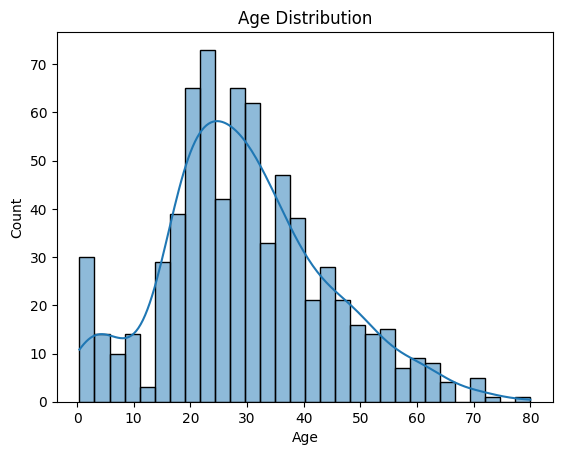

In [12]:
# 나이 분포 histogram
sns.histplot(df['Age'].dropna(), bins=30, kde = True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

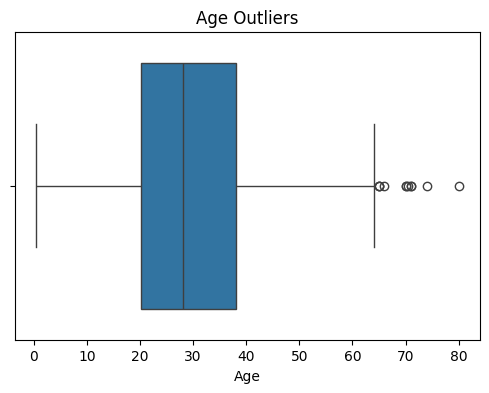

In [13]:
# 이상치 확인(boxplot)
plt.figure(figsize=(6, 4))
sns.boxplot(x=df["Age"])
plt.title("Age Outliers")
plt.show()

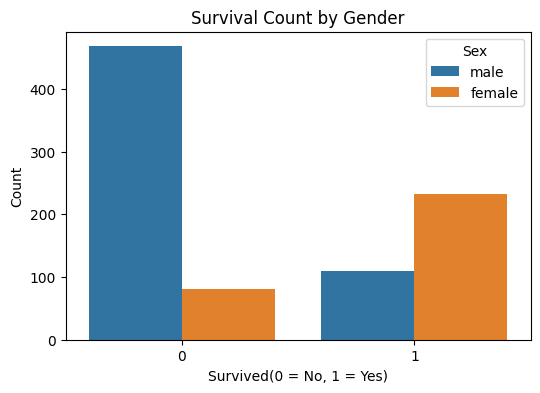

In [14]:
# 성별에 따른 생존 분포 countplot
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title("Survival Count by Gender")
plt.xlabel("Survived(0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

<Axes: xlabel='Pclass', ylabel='Survived'>

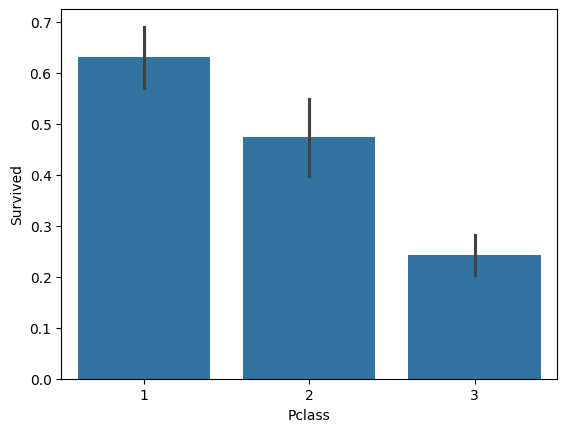

In [15]:
# 객실 등급과 생존률
sns.barplot(x='Pclass', y='Survived', data=df)

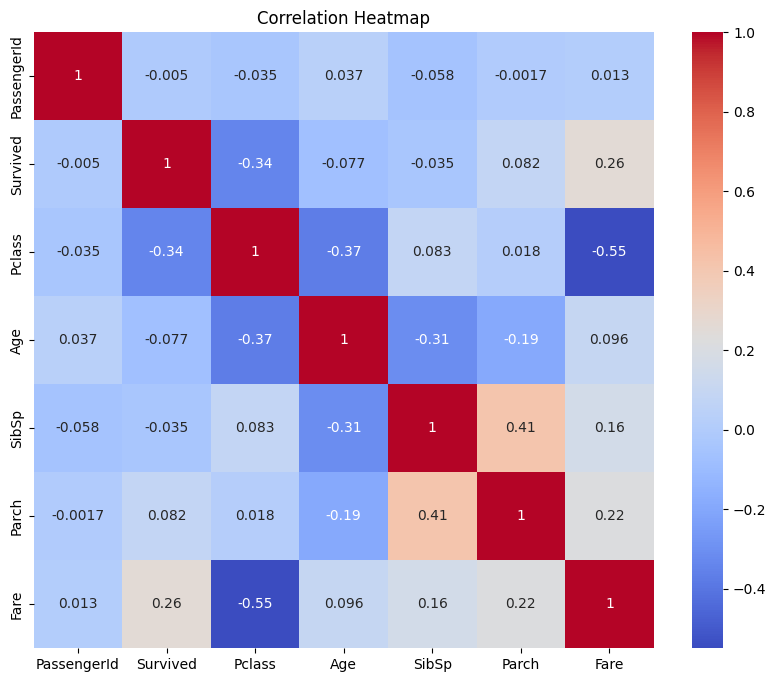

In [16]:
# 변수 간 상관관계 correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# 예시 코드(아래) 그대로 입력하니 df.corr()함수는 숫자형 열끼리만 상관계수를 계산할 수 있다며 에러
# 숫자형 열만 골라서 .corr()하는 것으로 수정
# sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

<function matplotlib.pyplot.show(close=None, block=None)>

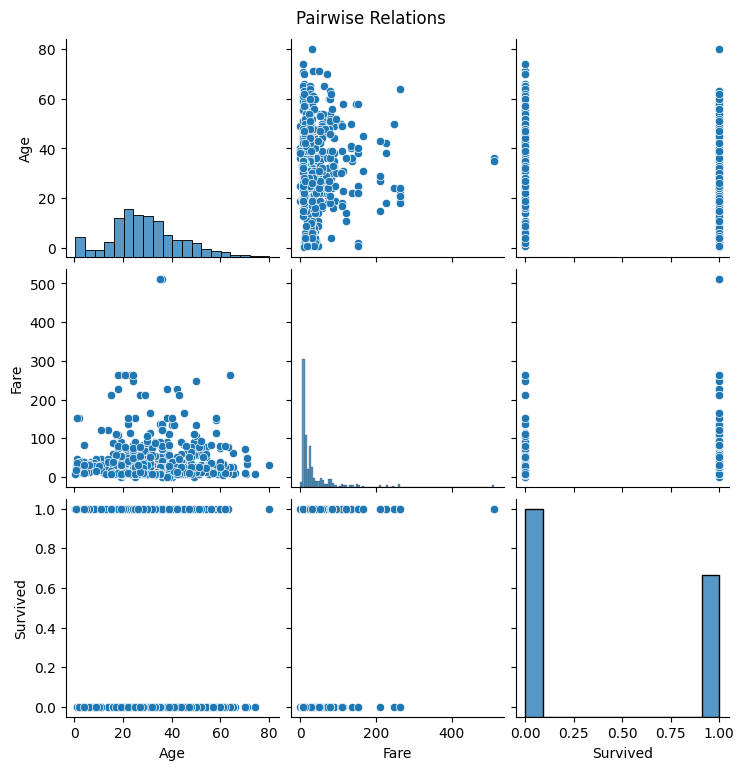

In [17]:
# 수치형 변수 간 관계 시각화(페어플롯)
sns.pairplot(df[["Age", "Fare", "Survived"]].dropna())
plt.suptitle("Pairwise Relations", y = 1.02)
plt.show

대각선(diagonal) : 각 변수의 histogram
- Age : 20 대 전후에 분포 집중
- Fare : 오른쪽으로 꼬리가 긴 분포(극단적 고가 요즘 존재)
- Survived : 이진값 (0:사망, 1:생존)

산점도(Scatter plots)
- Age vs Fare : 특별한 선형관계는 없으나 일부 고령 승객들이 높은 요금을 낸 경우가 있음
- Fare vs Survived : 높은 요금을 낸 승객일수록 생존확률이 높았을지도(우측 위쪽에 뚜렸한 점이 보인다)
- Age vs Survived : 생존자는 나이가 상대적으로 어린 편이 많고(0~30세 구간에 점들이 몰려있다), 일부 노년층도 생존자가 있다.

#5. 분석 질문 정의 및 탐색
1.  함께 탑승한 부모/자녀 수(Parch)가 생존률에 어떤 영향을 미치는가?
2. 형제/배우자 수(SibSp)가 많을수록 생존률에 어떤 변화가 있는가?
3. 탑승한 항구(Embarked)에 따라 승선요금(Fare)에 차이가 있는가?

,count
Parch,
0,678
1,118
2,80
3,5
4,4
5,5
6,1


,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


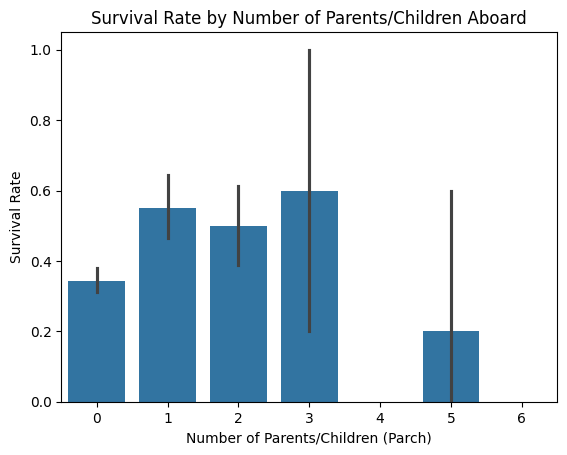

In [18]:
# 1. 함께 탑승한 부모/자녀 수(Parch)가 생존률에 어떤 영향을 미치는가?

# 각 parch 값에 따른 분포
display(df['Parch'].value_counts().sort_index())
# 각 parch 값에 대해 생존률의 평균
display(df.groupby('Parch')['Survived'].mean())

# 시각화
sns.barplot(x='Parch', y='Survived', data=df)
plt.title("Survival Rate by Number of Parents/Children Aboard")
plt.ylabel("Survival Rate")
plt.xlabel("Number of Parents/Children (Parch)")
plt.show()

- Parch = 1 ~ 3인 경우 생존률이 비교적 높게 나타남 (50~60%)
- Parch = 0인 혼자 탑승자는 생존률 34%
- Parch ≥ 4는 생존률이 0~20%로 급격히 낮아짐

다만 애초에 parch >= 3인 요소의 수가 매우 적어 신뢰할 수 있는 결과가 아님

,count
SibSp,
0,608
1,209
2,28
3,16
4,18
5,5
8,7


,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


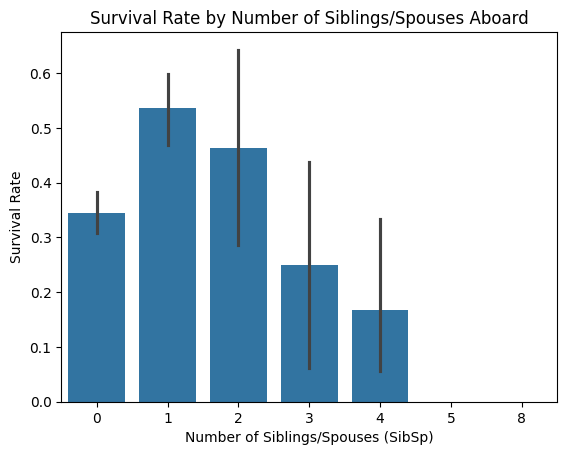

In [19]:
# 2. 형제/배우자 수(SibSp)가 생존률에 어떤 영향을 미치는가?

# 각 SibSP 값에 따른 분포
display(df['SibSp'].value_counts().sort_index())
# 각 SibSP 값에 대해 생존률의 평균
display(df.groupby('SibSp')['Survived'].mean())

# 시각화
sns.barplot(x='SibSp', y='Survived', data=df)
plt.title("Survival Rate by Number of Siblings/Spouses Aboard")
plt.ylabel("Survival Rate")
plt.xlabel("Number of Siblings/Spouses (SibSp)")
plt.show()

- SibSp = 1일 때 생존률이 가장 높음 (53.6%)
- SibSp = 2도 절반 정도 생존 (45.4%)
- SibSp = 3 이상은 생존률이 급감 (16% 이하)
- SibSp = 0은 생존률 34%

적당한 수의 동반자(형제 혹은 배우자)가 있을 때 생존률이 높았던 것으로 보인다.

,Fare
Embarked,
C,59.954144
Q,13.276030
S,27.079812


,Fare
Embarked,
C,29.70
Q,7.75
S,13.00


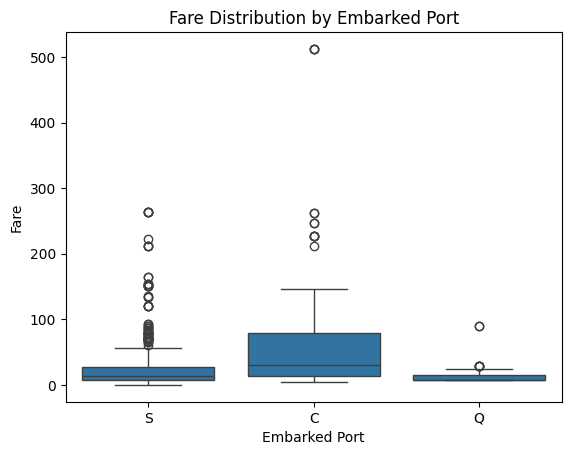

In [20]:
# 3. 탑승한 항구(Embarked)에 따라 승선요금(Fare)에 차이가 있는가?

# 항구별 평균 승선요금
display(df.groupby('Embarked')['Fare'].mean())

# 항구별 중앙값 요금 (왜냐하면 Fare는 이상치가 많아 평균이 왜곡될 수 있음)
display(df.groupby('Embarked')['Fare'].median())

# 시각화
sns.boxplot(x='Embarked', y='Fare', data=df)
plt.title("Fare Distribution by Embarked Port")
plt.xlabel("Embarked Port")
plt.ylabel("Fare")
plt.show()

- 평균 요금
  - C(Cherbourg) > Q(Queenstown) > S(Southampton)
- 중앙값 요금은 C 항구가 가장 높고, S는 가장 낮음
- 박스플롯에서 C항구의 승객은 고요금 승객이 많고 이상치도 많음

#6. 변수 조합 분석
여러 변수 조합을 통해 생존률의 차이를 분석하세요

Sex       female      male
Pclass                    
1       0.968085  0.368852
2       0.921053  0.157407
3       0.500000  0.135447


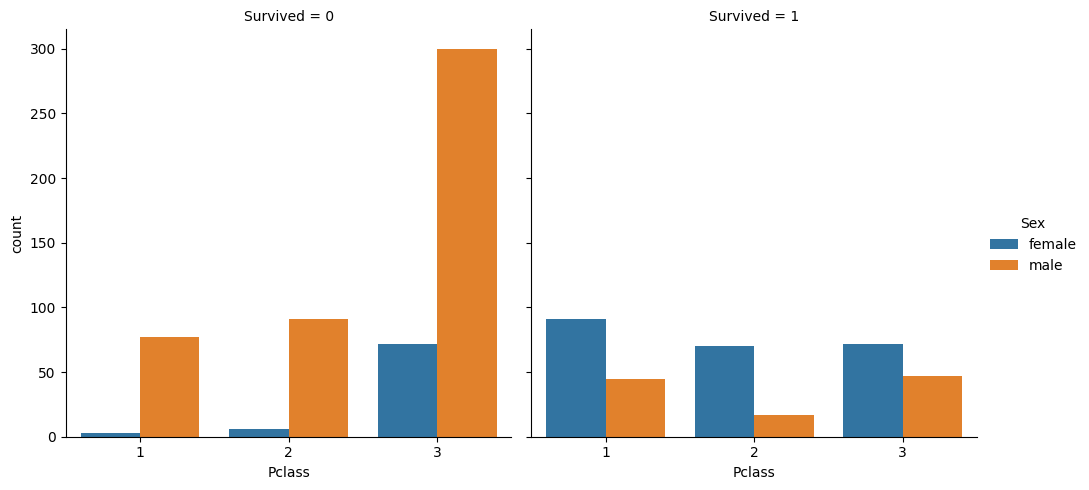

In [21]:
# 예시
# 성별 + 객실 등급에 따른 생존률
print(pd.crosstab(df['Pclass'], df['Sex'], values=df['Survived'], aggfunc='mean'))

# 시각화 예시
sns.catplot(x="Pclass", hue="Sex", col="Survived", kind="count", data=df)
plt.show()

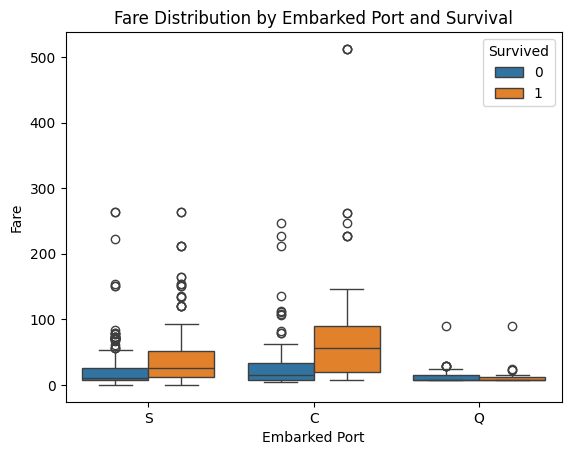

In [24]:
# Embarked (탑승항구)에 따른 생존률
# 탑승항구별 생존자와 사망자의 요금 분포 비교
# 생존 여부에 따라 Embarked와 Fare 분포 시각화
sns.boxplot(x='Embarked', y='Fare', hue='Survived', data=df)
plt.title("Fare Distribution by Embarked Port and Survival")
plt.xlabel("Embarked Port")
plt.ylabel("Fare")
plt.show()

세 항구 모두에서 생존자가 사망자보다 요금이 높은 경향
- C : 생존자는 평균적으로 요금이 높고, 고요금이 많음
- S : 전체 요금 낮고, 사망자 비중도 높음
- Q : 요금 매우 낮고, 생존자는 적은 수에만 집중됨

In [25]:
# 그룹별 평균 요금
df.groupby(['Embarked', 'Survived'])['Fare'].mean().unstack()

Survived,0,1
Embarked,,
C,35.443335,79.720926
Q,13.335904,13.182227
S,20.743987,39.547081


#Embarked + Survived별 평균 요금 비교

- C 항구 생존자의 평균 요금이 매우 높음 → 상류층 생존 가능성
- S 항구는 전체 평균이 낮지만, 생존자는 상대적으로 높은 요금 지불 → 요금이 생존과 관련
- Q 항구는 생존자/사망자의 요금이 큰 차이 없음 → 요금 외 요소가 생존에 더 영향

In [27]:
# Fare를 구간화
df['FareGroup'] = pd.cut(df['Fare'], bins=[0, 10, 30, 100, 600])

# 구간화 후 생존률 확인
pd.crosstab([df['Embarked'], df['FareGroup']], df['Survived'], normalize='index')

Survived                    0         1
Embarked FareGroup                     
C        (0, 10]     0.756757  0.243243
         (10, 30]    0.500000  0.500000
         (30, 100]   0.269231  0.730769
         (100, 600]  0.275862  0.724138
Q        (0, 10]     0.611111  0.388889
         (10, 30]    0.619048  0.380952
         (30, 100]   0.500000  0.500000
S        (0, 10]     0.843478  0.156522
         (10, 30]    0.576000  0.424000
         (30, 100]   0.552000  0.448000
         (100, 600]  0.250000  0.750000

# Embarked + FareGroup별 생존률 비교
- C 항구 : 요금이 30 이상일 때 생존률이 급격히 상승함 → 구조 우선 대상?
- Q 항구는 전체적으로 요금과 생존률 간 뚜렷한 상관관계는 적음
- S 항구도 요금이 오를수록 생존률이 뚜렷하게 증가 ->
특히 100 이상 요금을 낸 사람들의 생존률은 75%